In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report

In [ ]:
import pandas as pd
a=pd.read_csv("/content/indian_liver_patient.csv")
print(a)

     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65  Female              0.7               0.1                   187   
1     62    Male             10.9               5.5                   699   
2     62    Male              7.3               4.1                   490   
3     58    Male              1.0               0.4                   182   
4     72    Male              3.9               2.0                   195   
..   ...     ...              ...               ...                   ...   
578   60    Male              0.5               0.1                   500   
579   40    Male              0.6               0.1                    98   
580   52    Male              0.8               0.2                   245   
581   31    Male              1.3               0.5                   184   
582   38    Male              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  

In [ ]:
print(a.isnull())

       Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0    False   False            False             False                 False   
1    False   False            False             False                 False   
2    False   False            False             False                 False   
3    False   False            False             False                 False   
4    False   False            False             False                 False   
..     ...     ...              ...               ...                   ...   
578  False   False            False             False                 False   
579  False   False            False             False                 False   
580  False   False            False             False                 False   
581  False   False            False             False                 False   
582  False   False            False             False                 False   

     Alamine_Aminotransferase  Aspartate_Aminotrans

In [ ]:
a1=a.dropna()
y=a1["Dataset"]
print(y)
x=a1.drop(['Gender','Dataset'],axis=1)

print(x)
print(x.shape)

0      1
1      1
2      1
3      1
4      1
      ..
578    2
579    1
580    1
581    1
582    2
Name: Dataset, Length: 579, dtype: int64
     Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65              0.7               0.1                   187   
1     62             10.9               5.5                   699   
2     62              7.3               4.1                   490   
3     58              1.0               0.4                   182   
4     72              3.9               2.0                   195   
..   ...              ...               ...                   ...   
578   60              0.5               0.1                   500   
579   40              0.6               0.1                    98   
580   52              0.8               0.2                   245   
581   31              1.3               0.5                   184   
582   38              1.0               0.3                   216   

     Alamine_Aminotransferase  

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=35)
print(x_train)
print(y_train)
print(x_train.shape)
print(y_train.shape)

#print(x_train.isnull(),y_train.isnull())


     Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
145   65              0.8               0.2                   201   
496   24              1.0               0.2                   189   
315   22              0.9               0.3                   179   
519   35             26.3              12.1                   108   
572   32             15.6               9.5                   134   
..   ...              ...               ...                   ...   
184   64              1.1               0.4                   201   
251   33              0.9               0.8                   680   
452   58              0.9               0.2                  1100   
33    38              2.6               1.2                   410   
274   33              1.8               0.8                   196   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
145                        18                          22             5.4   
496              

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred1 = model.predict(x_test)
accuracy_LR = accuracy_score(y_test, y_pred1)
report = classification_report(y_test, y_pred1)

print("Accuracy:", accuracy_LR)
print("Classification Report:\n",report)

Accuracy: 0.7241379310344828
Classification Report:
               precision    recall  f1-score   support

           1       0.76      0.92      0.83        85
           2       0.46      0.19      0.27        31

    accuracy                           0.72       116
   macro avg       0.61      0.56      0.55       116
weighted avg       0.68      0.72      0.68       116



In [ ]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score




# Creating an SVM classifier
svm_classifier = SVC(kernel='linear')

# Training the classifier on the training data
svm_classifier.fit(x_train, y_train)

# Makeing predictions on the test data
y_pred2 = svm_classifier.predict(x_test)

# Calculating accuracy
accuracy_svm1 = accuracy_score(y_test, y_pred2)
print(f"Accuracy:{accuracy_svm1}")
print("Classification Report:\n",report)


Accuracy:0.7327586206896551
Classification Report:
               precision    recall  f1-score   support

           1       0.76      0.92      0.83        85
           2       0.46      0.19      0.27        31

    accuracy                           0.72       116
   macro avg       0.61      0.56      0.55       116
weighted avg       0.68      0.72      0.68       116



In [ ]:
from imblearn.over_sampling import SMOTE



# Initializing SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Applying SMOTE to the dataset
X_resampled,y_resampled= smote.fit_resample(x,y)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=35)
#print(x_train)
#print(y_train)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
#print(x_train.isnull(),y_train.isnull())


(662, 9)
(662,)
(166, 9)
(166,)


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
from sklearn.metrics import accuracy_score, classification_report

y_pred3 = model.predict(x_test)
accuracy_AFLR = accuracy_score(y_test, y_pred3)
report = classification_report(y_test, y_pred3)

print("Accuracy:", accuracy_AFLR)
print("Classification Report:\n",report)

Accuracy: 0.7469879518072289
Classification Report:
               precision    recall  f1-score   support

           1       0.75      0.59      0.66        69
           2       0.75      0.86      0.80        97

    accuracy                           0.75       166
   macro avg       0.75      0.72      0.73       166
weighted avg       0.75      0.75      0.74       166



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
if __name__ == "__main__":
    # Sample data (replace with your own dataset)
    X = np.array(X_resampled)
    y = np.array(y_resampled)

    # Create a Perceptron instance and fit the model (without specifying learning_rate)
    perceptron = Perceptron(max_iter=1000)
    perceptron.fit(X, y)

    # Make predictions
    new_data = np.array(x_test)
    predictions = perceptron.predict(new_data)
    print("Predictions:", predictions)

    # Assuming you have already imported and defined 'accuracy_score' and 'classification_report'
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    print("Classification Report:\n", report)
    print(f"Accuracy: {accuracy}")


Predictions: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.03      0.06        69
           2       0.59      1.00      0.74        97

    accuracy                           0.60       166
   macro avg       0.80      0.51      0.40       166
weighted avg       0.76      0.60      0.46       166

Accuracy: 0.5963855421686747


In [ ]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear')

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred4= svm_classifier.predict(X_test)

# Calculate accuracy
accuracy_SVM = accuracy_score(y_test, y_pred4)
print(f"Accuracy:{accuracy_SVM}")
print("Classification Report:\n",report)


Accuracy:0.7108433734939759
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.03      0.06        69
           2       0.59      1.00      0.74        97

    accuracy                           0.60       166
   macro avg       0.80      0.51      0.40       166
weighted avg       0.76      0.60      0.46       166



Accuracy: 0.58


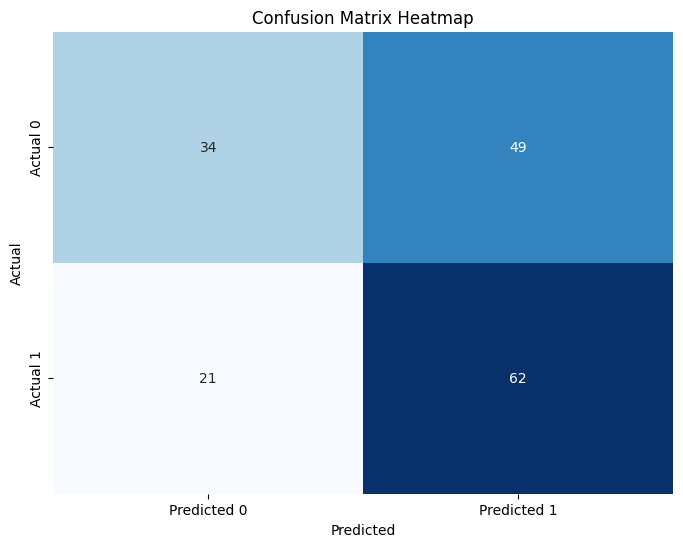

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score


# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred3)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred3)
print(f'Accuracy: {accuracy:.2f}')

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k = 3
knn_classifier = KNeighborsClassifier(n_neighbors=k)

knn_classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

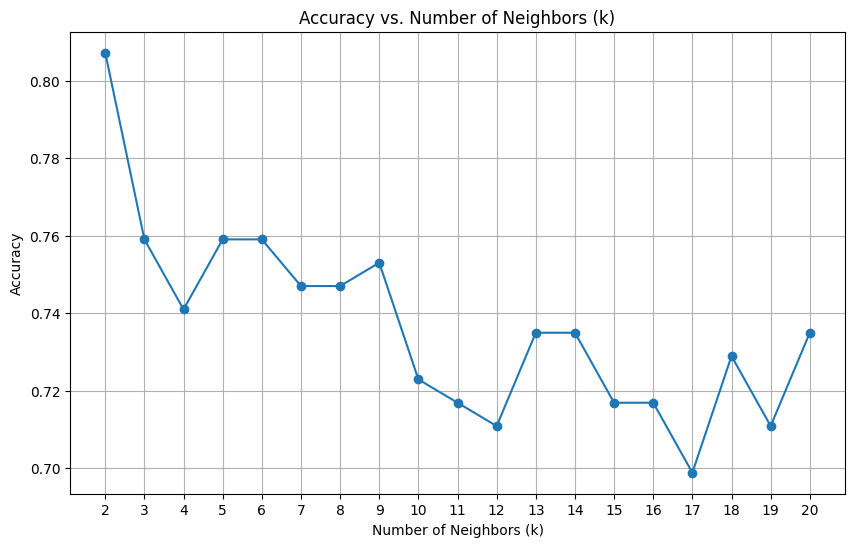

Maximum Accuracy: 0.8072289156626506


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize empty lists to store accuracy values and corresponding 'k' values
k_values = []
accuracy_values = []

# Iterate through different 'k' values from 2 to 20
for k in range(2, 21):
    # Create a k-NN classifier with the current 'k' value
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = knn_classifier.predict(X_test)

    # Calculate the accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    k_values.append(k)
    accuracy_values.append(accuracy)

# Plot the accuracy versus 'k'
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_values, marker='o', linestyle='-')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(np.arange(2, 21, step=1))
plt.show()
max_ac=max(accuracy_values)
print("Maximum Accuracy:",max_ac)


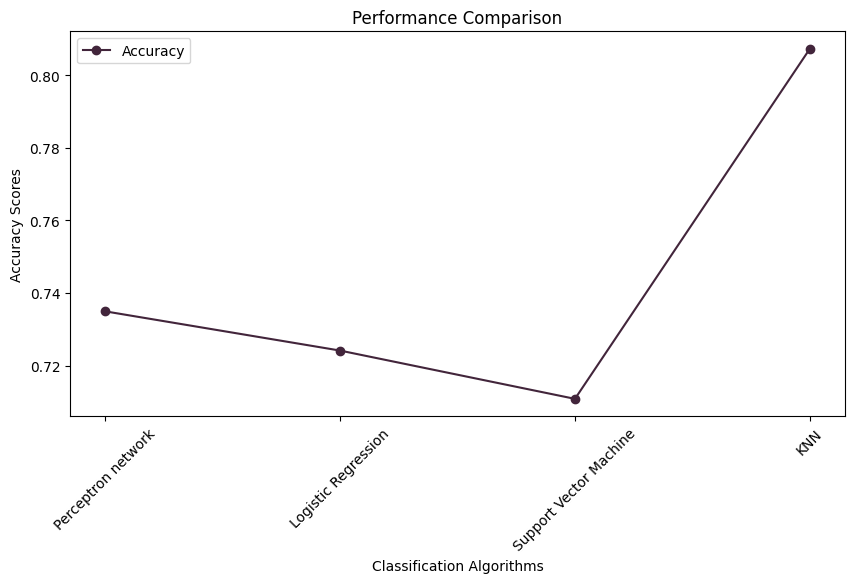

In [ ]:
algorithm_names = ['Perceptron network','Logistic Regression','Support Vector Machine','KNN']
accuracy_scores = [ accuracy , accuracy_LR , accuracy_SVM, max_ac ]
# Plotting the scores
plt.figure( figsize = ( 10 , 5 ) )
# Accuracy scores plot
plt.plot(algorithm_names, accuracy_scores, label = 'Accuracy', marker = 'o', color = '#42253B')
plt.xlabel( 'Classification Algorithms' )
plt.ylabel( 'Accuracy Scores' )
plt.title( 'Performance Comparison' )
# Adding a legend
plt.legend()

# Rotating the x-axis labels for better visibility
plt.xticks( rotation = 45 )

# Displaying the plot

plt.show()

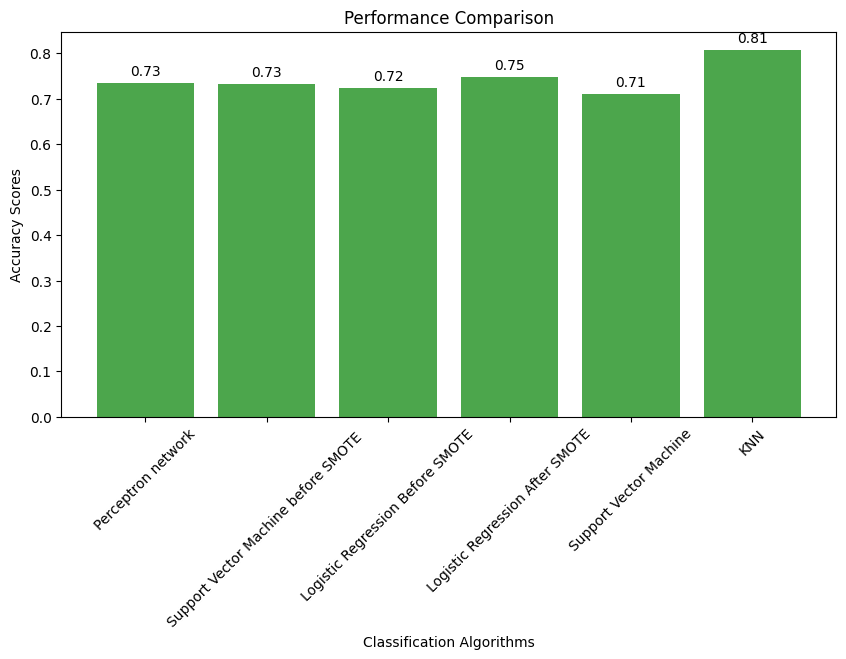

In [ ]:
import matplotlib.pyplot as plt

algorithm_names = ['Perceptron network','Support Vector Machine before SMOTE ', 'Logistic Regression Before SMOTE','Logistic Regression After SMOTE', 'Support Vector Machine','KNN']
accuracy_scores = [accuracy,accuracy_svm1, accuracy_LR,accuracy_AFLR, accuracy_SVM,max_ac]

plt.figure(figsize=(10, 5))

# Bar chart for accuracy scores
plt.bar(algorithm_names, accuracy_scores, color='Green', alpha=0.7)
plt.xlabel('Classification Algorithms')
plt.ylabel('Accuracy Scores')
plt.title('Performance Comparison')

# Adding data labels
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')

# Rotating the x-axis labels for better visibility
plt.xticks(rotation=45)

# Displaying the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


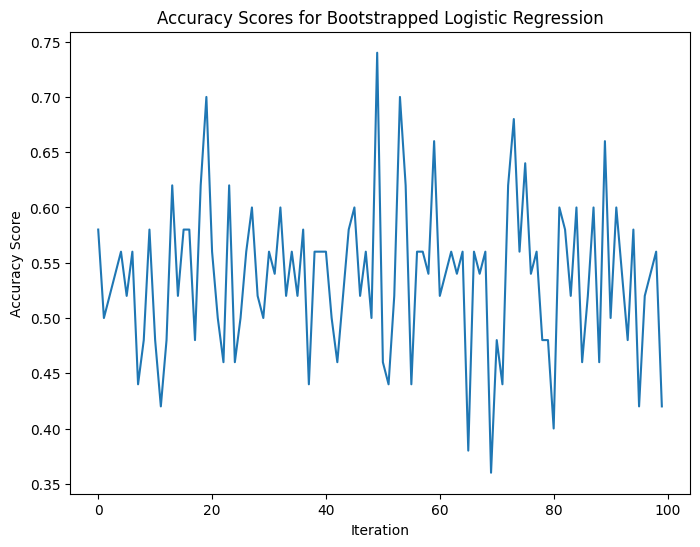

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import numpy as np

n_bootstrap_samples = 50
n_iterations = 100
model = LogisticRegression()
model.fit(x_test, y_test)

accuracy_scores = []

for _ in range(n_iterations):
    X_resampled, y_resampled = resample(X_train, y_train, n_samples=n_bootstrap_samples)


    y_p = model.predict(X_resampled)

    accuracy = accuracy_score(y_resampled, y_p)
    accuracy_scores.append(accuracy)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(range(n_iterations), accuracy_scores)
plt.xlabel("Iteration")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Scores for Bootstrapped Logistic Regression")
plt.show()


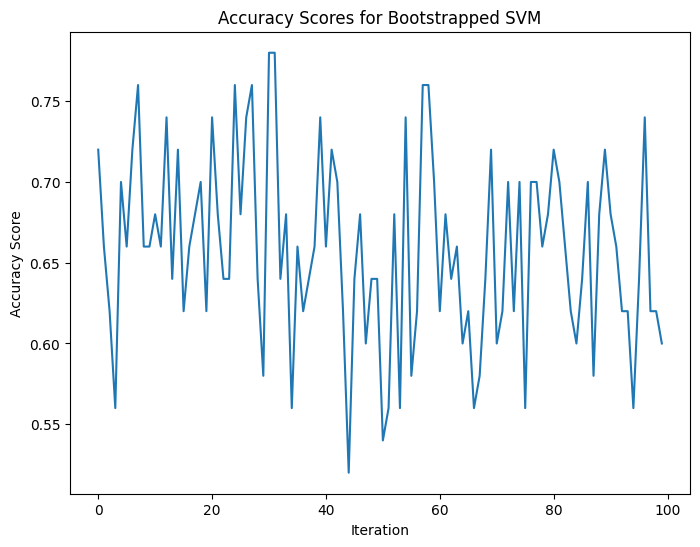

In [ ]:
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

n_bootstrap_samples = 50
n_iterations = 100

# Create an SVM model
model = SVC()

# Fit the SVM model to your test data (x_test, y_test)
model.fit(x_test, y_test)

accuracy_scores = []

for _ in range(n_iterations):
    # Resample the training data
    X_resampled, y_resampled = resample(X_train, y_train, n_samples=n_bootstrap_samples)

    # Predict using the SVM model
    y_p = model.predict(X_resampled)

    # Calculate accuracy score
    accuracy = accuracy_score(y_resampled, y_p)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(8, 6))
plt.plot(range(n_iterations), accuracy_scores)
plt.xlabel("Iteration")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Scores for Bootstrapped SVM")
plt.show()


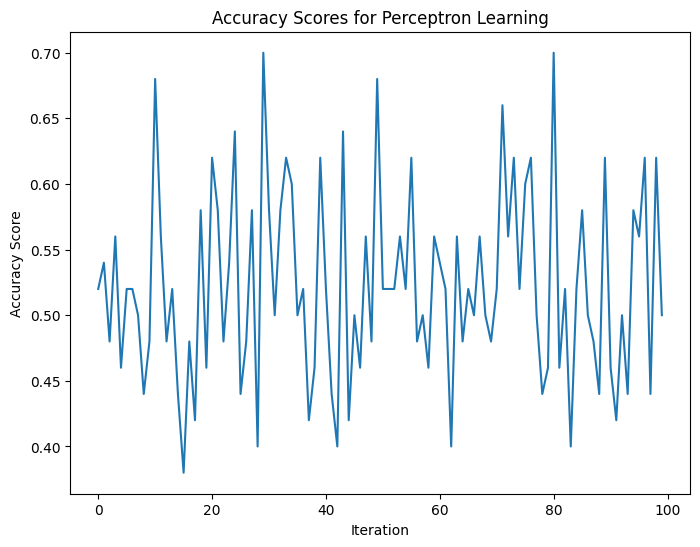

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

n_iterations = 100

# Create a Perceptron model
model = Perceptron()

# Fit the Perceptron model to your test data (x_test, y_test)
model.fit(x_test, y_test)

accuracy_scores = []

for _ in range(n_iterations):
    # Predict using the Perceptron model on the training data
    X_resampled, y_resampled = resample(X_train, y_train, n_samples=n_bootstrap_samples)
    y_p = model.predict(X_resampled)

    # Calculate accuracy score
    accuracy = accuracy_score(y_resampled, y_p)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(8, 6))
plt.plot(range(n_iterations), accuracy_scores)
plt.xlabel("Iteration")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Scores for Perceptron Learning")
plt.show()


In [ ]:
new_data = [[77,5.9,3.8,316,48,65,6.7,3.8,0.90]]
predictions = model.predict(new_data)

# Print the predictions
print(predictions)

# Evaluate the model on the testing set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the testing set: {accuracy}")

[1]
Accuracy on the testing set: 0.5481927710843374


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(
